In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
df = pd.read_csv(r'..\Data\FB.csv')

In [3]:
df['Close'] = df['Close']

In [4]:
train = df.Close[0:-30]
test = df.Close[-30:]

In [5]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [6]:
from sklearn.model_selection import ParameterGrid
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 
              'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))



In [ ]:
''''
Holt Parameters:

    endog (array-like) – Time series
    expoential (bool, optional) – Type of trend component.
    damped (bool, optional) – Should the trend component be damped.
''''

In [ ]:
''''
fit Parameters:

    smoothing_level (float, optional) – The alpha value of the simple exponential smoothing, if the value is set then this value will be used as the value.
    smoothing_slope (float, optional) – The beta value of the holts trend method, if the value is set then this value will be used as the value.
    damping_slope (float, optional) – The phi value of the damped method, if the value is set then this value will be used as the value.
    optimized (bool, optional) – Should the values that have not been set above be optimized automatically?
    '''


In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


In [8]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)


 Below mentioned parameter gives least RMSE and r2


,smoothing_level,smoothing_slope,damping_slope,damped,RMSE,r2
806,0.9,0.6,0.1,False,2.176486,0.741182


In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

In [10]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

In [14]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 4.737090445686715
MAE is : 1.8121525217302623
RMSE is : 2.1764858018573694
MAPE is : 0.9266024548104875
R2 is : 0.7411820826314525



In [ ]:
# Automated Parameter

In [15]:
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)

In [16]:
fitESAUTO.summary()

Dep. Variable:,Close,No. Observations:,1229
Model:,Holt,SSE,8955.547
Optimized:,True,AIC,2448.883
Trend:,Additive,BIC,2469.339
Seasonal:,None,AICC,2448.952
Seasonal Periods:,None,Date:,"Fri, 01 Apr 2022"
Box-Cox:,False,Time:,17:53:53
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9796487,alpha,True
smoothing_trend,1.1385e-16,beta,True


In [17]:
fitESAUTOpred = fitESAUTO.forecast(30)

In [18]:
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 69.50748152507994
MAE is : 7.521440963737192
RMSE is : 8.33711470024732
MAPE is : 3.813041172397496
R2 is : -2.7976436836316485



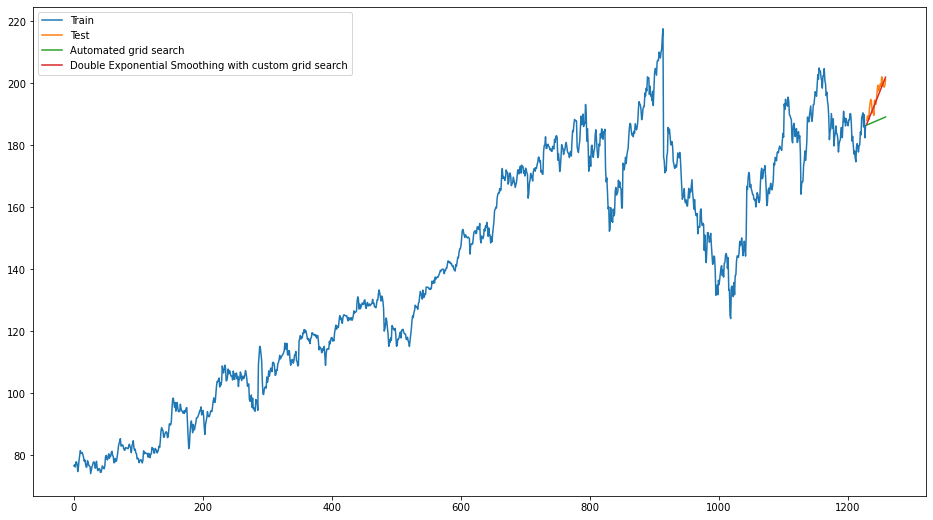

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()
